## Objective
* This is to demonstrate how linear regression is applied for CO2 level prediction
* Evaluate the accuracy of the model

## Work Flow

1. Import libraries, import LinearRegression to implement LR
2. Read CO2 dataset from scikit-learn, plot to show the general trend of data
3. Analyze data
4. Add seasonal variables into the supervised model and fitting a linear regression with 2 variables 
5. Add autoregressive variables
6. Delete missing values
7. Fit the full linear regression model

### Import libraries

In [6]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

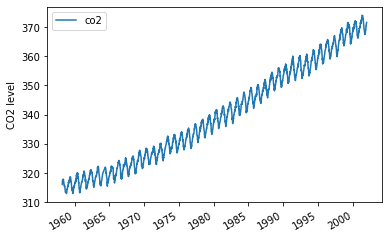

In [7]:
# Get dataset

data = sm.datasets.co2.load_pandas()
co2 = data.data
co2 = co2.dropna()
ax = co2.plot()
ax.set_ylabel('CO2 level')
plt.show()

### Analyze Data

In [40]:
# Describe data
co2.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [3]:
co2.columns

Index(['co2'], dtype='object')

### Add seasonal variables

In [8]:
co2['year'] = [x.year for x in co2.index]
co2['month'] = [x.month for x in co2.index]
co2.head()

/var/folders/66/dcvrzw3x4t35qvr38ldz56640000gn/T/ipykernel_4282/2978345605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['year'] = [x.year for x in co2.index]
/var/folders/66/dcvrzw3x4t35qvr38ldz56640000gn/T/ipykernel_4282/2978345605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2['month'] = [x.month for x in co2.index]


,co2,year,month
1958-03-29,316.1,1958,3
1958-04-05,317.3,1958,4
1958-04-12,317.6,1958,4
1958-04-19,317.5,1958,4
1958-04-26,316.4,1958,4


### Fitting a linear regression with two seasonable variables

0.9690528910892234 0.34332512339529164


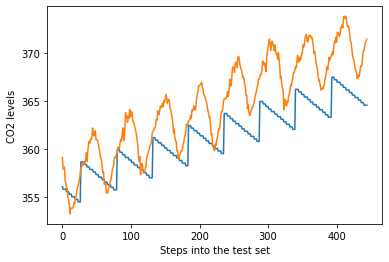

In [9]:
# Create X and y objects
X = co2[['year', 'month']]
y = co2['co2']

# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()

* The train R2 of the above model is 0.96, which is great
* The test R2 is 0.34, which is bad. There is some improvement to be made

### Add autoregressive components with feature engineering
* Create 5 lagged variables with shift method

In [11]:
# Add lagged variables into the data

co2['co2_l1'] = co2['co2'].shift(1)
co2['co2_l2'] = co2['co2'].shift(2)
co2['co2_l3'] = co2['co2'].shift(3)
co2['co2_l4'] = co2['co2'].shift(4)
co2['co2_l5'] = co2['co2'].shift(5)

### Drop missing values
* Lagged variables create NA in the data, we need to delete any missing data

In [12]:
co2 = co2.dropna()

### Fit the full linear regression model

0.998797756425323 0.99043701204628


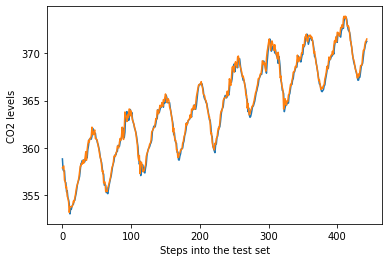

In [13]:
# Create X and y objects
X = co2[['year', 'month', 'co2_l1', 'co2_l2', 'co2_l3', 'co2_l4', 'co2_l5']]
y = co2['co2']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345,shuffle=False)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X = X_train, y = y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(train_r2, test_r2)

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel('Steps into the test set')
plt.ylabel('CO2 levels')
plt.show()

* The R2 train score of this model is 0.998, and the R2 test score is 0.990. It is a great performance. 
* In the plot, we can see the predictions follow the actual values almost perfectly.